<a href="https://colab.research.google.com/github/janmlew/innerjoin/blob/main/DC_Inner_Join_(Ch1_of_JDwp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uwaga! Kod poniżej to jedno z ćwiczeń DataCamp (edytowane via [Spyder](https://www.spyder-ide.org/)).

  account ward  aid              business              address    zip  \
0  307071    3  743  REGGIE'S BAR & GRILL      2105 S STATE ST  60616   
1      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633   
2      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633   
3   10002   14  775           CELINA DELI    5089 S ARCHER AVE  60632   
4   10002   14  775           CELINA DELI    5089 S ARCHER AVE  60632   

  first_name last_name      title  
0     ROBERT     GLICK     MEMBER  
1      PEARL   SHERMAN  PRESIDENT  
2      PEARL   SHERMAN  SECRETARY  
3     WALTER    MROZEK    PARTNER  
4     CELINA    BYRDAK    PARTNER  
                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970

The structure of the three DataFrames is as follows:
*cal*           *ridership*       *stations*
 year---------\  station_id--------station_id
 month------\  \-year    

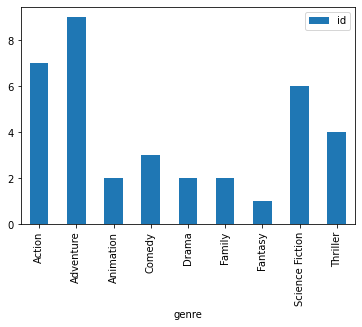

In [ ]:
import pandas as pd

PATH = '/content/drive/MyDrive/Colab Notebooks/Project/datasets'

#wards = pd.read_pickle(PATH+'/ward.p')
#census = pd.read_pickle(PATH+'/census.p')

#print(wards.head())
#print(census.head())

#wards_census = wards.merge(census, on='ward', suffixes=('_ward', '_cen'))
#print(wards_census.head())

#print(str(wards.shape)+' '+str(census.shape)+' '+str(wards_census.shape))

#taxi_owners = pd.read_pickle(PATH+'/taxi_owners.p')
#taxi_veh = pd.read_pickle(PATH+'/taxi_vehicles.p')

#taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own', '_veh'))

#print(taxi_own_veh.head())
#print(taxi_own_veh['fuel_type'].value_counts())

biz_owners = pd.read_pickle(PATH+'/business_owners.p')
licenses = pd.read_pickle(PATH+'/licenses.p')

#print(biz_owners.head())
#print(licenses.head())

licenses_owners = licenses.merge(biz_owners, on='account')
counted_df = licenses_owners.groupby('title').agg({'account':'count'})
# Here 'count' means the count function.
sorted_df = counted_df.sort_values('account', ascending=False)

print(licenses_owners.head())
print(sorted_df.head())

ridership = pd.read_pickle(PATH+'/cta_ridership.p')
cal = pd.read_pickle(PATH+'/cta_calendar.p')
stations= pd.read_pickle(PATH+'/stations.p')

ridership_cal_stations = ridership.merge(cal, on=['year', 'month', 'day']) \
    .merge(stations, on='station_id') #The '\' LINE CONTINUATION SIGN above is IMPORTANT!

filter_criteria = ((ridership_cal_stations['month'] == 7)
                   & (ridership_cal_stations['day_type'] == 'Weekday')
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

print()
print('The structure of the three DataFrames is as follows:')
print('*cal*           *ridership*       *stations*')
print(' year---------\  station_id--------station_id')
print(' month------\  \-year              station_name')
print(' day------\  \---month             location')
print(' day_type  \-----day')
print('                 rides')
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

land_use = pd.read_pickle(PATH+'/land_use.p')
census = pd.read_pickle(PATH+'/census.p')
licenses = pd.read_pickle(PATH+'/licenses.p')

land_vac_lic = land_use.merge(census, on='ward')\
    .merge(licenses, on='ward', suffixes=('_cen', '_lic'))

pop_vac_lic = land_vac_lic.groupby(['ward', 'pop_2010', 'vacant'],
                                   as_index=False).agg({'account':'count'})
#pop_vac_lic_byward = land_vac_lic.groupby('ward', as_index=False).agg({'account':'count'})
#grouping by 'ward' gives almost the same result as grouping by three different colnames.
#pop_vac_lic_byvac = land_vac_lic.groupby('vacant', as_index=False).agg({'account':'count'})
#But this changes things. This is probably because the DFs are merged by 'ward' col.
#pop_vac_lic_2 = land_vac_lic.groupby(['ward', 'vacant']).agg({'account':'count'})
# By default as_index=True. This flag changes groupby colnames into indexes or not if False.

sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'],
                                             ascending = [False, True, True])

movies = pd.read_pickle(PATH+'/movies.p')
financials = pd.read_pickle(PATH+'/financials.p')

movies_financials = movies.merge(financials, on='id', how='left')
how_many_movies_nobudget = movies_financials['budget'].isnull().sum()
print(how_many_movies_nobudget)
how_many_movies_nobudget = movies_financials['budget'].isna().sum()
print(how_many_movies_nobudget)

movie_to_genres = pd.read_pickle(PATH+'/movie_to_genres.p')
scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction']
action_movies = movie_to_genres[movie_to_genres['genre'] == 'Action']

action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes = ('_act', '_sci'))
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
movies_and_scifi_only = movies.merge(scifi_only, how = 'inner', left_on='id',
                                     right_on='movie_id')

pop_movies = movies.sort_values('popularity', ascending=False).head(10)
genres_movies = movie_to_genres.merge(pop_movies, how='right',
                                      right_on='id', left_on='movie_id')
genre_count = genres_movies.groupby('genre').agg({'id':'count'})
genre_count.plot(kind='bar')

sequels = pd.read_pickle(PATH+'/sequels.p')
mov_seq = sequels.merge(sequels, left_on='sequel', right_on='id', suffixes=('_org', '_seq'))

crews = pd.read_pickle(PATH+'/crews.p')
crews_self = crews.merge(crews, on='id', suffixes=('_dir', '_crew'),
                         validate='many_to_many')
                        #Uwaga! Argument 'validate' sprawdza relację w tabeli. Tu nie
                        #dostrzegł błędu, więc relacja NIE jest 'one_to_one', 'one_to_many'
                        #czy 'many_to_one'

dir_crew_boolean = ((crews_self['job_dir'] == 'Director') &
                    (crews_self['job_crew'] != 'Director'))
dir_crew = crews_self[dir_crew_boolean]

#movies = movies.set_index('id')
#sequels = sequels.set_index('id')
#financials = financials.set_index('id')
#sequels_fin = sequels.merge(financials, on='id', how='left')
#sequels_fin['sequel'] = sequels_fin['sequel'].fillna(0)
# Apparently, indexes cannot be NaNs.
#orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', right_on='id',
#                             right_index=True, suffixes=('_org', '_seq'))
#orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
#print(orig_seq[['title_org', 'title_seq', 'diff']].sort_values('diff',
#                                                               ascending=False).head())

antijoin = movies.merge(scifi_movies, left_on='id', right_on='movie_id', how='left',
                        indicator=True)
idlist = antijoin.loc[antijoin['_merge'] == 'left_only', 'id']
print(movies[movies['id'].isin(idlist)])